Here, for the probit and cloglog link functions, I plot the derivatives of the FI.

# Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Helper Functions:

In [9]:
## import link functions:
from binary_links import *

In [15]:
def clean_values(df):
    temp_df = pd.DataFrame(df)

    temp_df.columns = ['x', 'beta', 'deriv_fi']
    temp_df['beta'] = np.round(temp_df['beta'], 2)
    temp_df['x'] = np.round(temp_df['x'], 2)
    temp_df = temp_df.pivot(columns = 'x', values = 'deriv_fi', index = 'beta')
    
    return temp_df

# Compute Probit derivatives:

In [12]:
x_abs_max = 2
beta_abs_max = 2

x_range = np.linspace(-x_abs_max, x_abs_max, num=1 + x_abs_max * 100)
beta_range = np.linspace(-beta_abs_max, beta_abs_max, num =1 + beta_abs_max * 100)

In [ ]:
probit_link = Probit_Link()

pos_y_vals = []
zero_y_vals = []
for temp_x in tqdm(x_range):
    for temp_beta in beta_range:
        pos_y_vals.append([temp_x, temp_beta, probit_link.fi_deriv(temp_x, temp_beta, 1)])
        zero_y_vals.append([temp_x, temp_beta, probit_link.fi_deriv(temp_x, temp_beta, 0)])
        

In [16]:
probit_pos_y_vals = clean_values(pos_y_vals)
probit_zero_y_vals = clean_values(zero_y_vals)

# Compute CLogLog derivatives:

In [18]:
x_abs_max = 1.5
beta_abs_max = 1.5

x_range = np.linspace(-x_abs_max, x_abs_max, num=1 + int(x_abs_max * 100))
beta_range = np.linspace(-beta_abs_max, beta_abs_max, num =1 + int(beta_abs_max * 100))

In [19]:
clog_log = CLogLogLink()

pos_y_vals = []
zero_y_vals = []
for temp_x in tqdm(x_range):
    for temp_beta in beta_range:
        pos_y_vals.append([temp_x, temp_beta, clog_log.fi_deriv(temp_x, temp_beta, 1)])
        zero_y_vals.append([temp_x, temp_beta, clog_log.fi_deriv(temp_x, temp_beta, 0)])
        

100%|█████████████████████████████████████████████████████████████████████████████| 151/151 [00:01<00:00, 114.25it/s]


In [20]:
cloglog_pos_y_vals = clean_values(pos_y_vals)
cloglog_zero_y_vals = clean_values(zero_y_vals)

# plot deriv of FI for cloglog + probit concurrently:

In [26]:
x_tick_freq = 20
y_tick_freq = 20

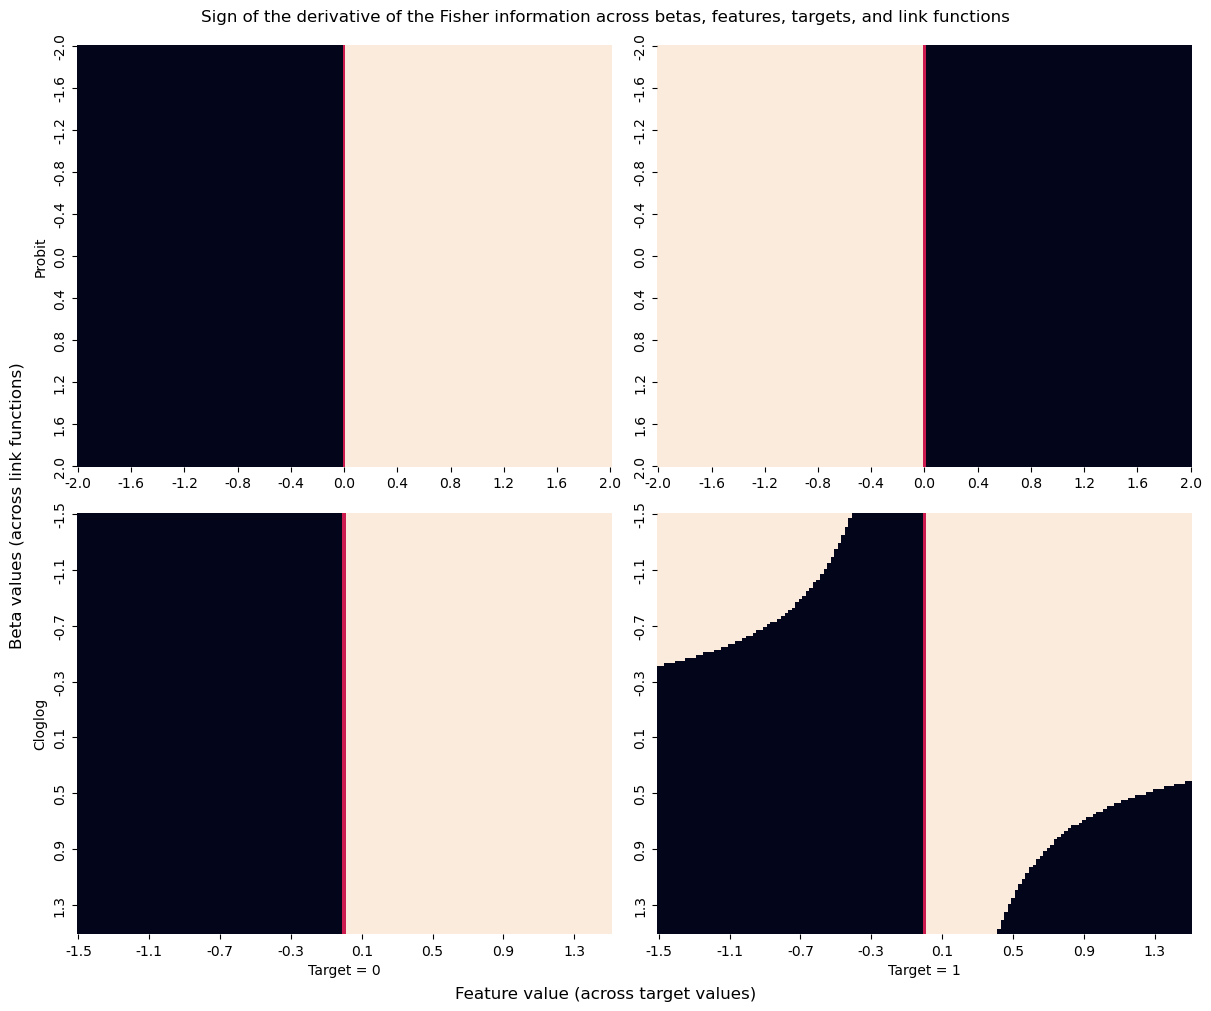

In [27]:
fig, axes = plt.subplots(2, 2, 
                         constrained_layout=True, 
                         figsize=(12, 10))
sns.heatmap(np.sign(probit_zero_y_vals), ax = axes[0][0], cbar=False, xticklabels=x_tick_freq, yticklabels=y_tick_freq)
sns.heatmap(np.sign(probit_pos_y_vals), ax = axes[0][1], cbar=False, xticklabels=x_tick_freq, yticklabels=y_tick_freq)

sns.heatmap(np.sign(cloglog_zero_y_vals), ax = axes[1][0], cbar=False, xticklabels=x_tick_freq, yticklabels=y_tick_freq)
sns.heatmap(np.sign(cloglog_pos_y_vals), ax = axes[1][1], cbar=False, xticklabels=x_tick_freq, yticklabels=y_tick_freq)
for i in range(2):
    for j in range(2):
        ax = axes[i][j]
        if i == 1:
            ax.set_xlabel(f"Target = {j}")
        else:
            ax.set_xlabel(f"")
        if j == 0:
            if i == 0:
                ax.set_ylabel('Probit')
            else:
                ax.set_ylabel('Cloglog')
        else:
            ax.set_ylabel(f"")
fig.suptitle("Sign of the derivative of the Fisher information across " + \
             "betas, features, targets, and link functions")
fig.supxlabel("Feature value (across target values)")
fig.supylabel("Beta values (across link functions)") 
plt.savefig("fi_deriv_signs")